### PyTorch Tutorial

##### We want to train a simple Neural Network to approximate Sin(x) in the range -3 < x < 3

We start by importing the necessary libraries:

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We can create the data points for sin(𝑥)

In [26]:
# Generate data
x = np.linspace(-3, 3, 500).reshape(-1, 1)  # Inputs
y = np.sin(x)  # Targets

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

Define a simple feedforward neural network:

In [23]:
class SinApproximator(nn.Module):
    def __init__(self):
        super(SinApproximator, self).__init__()
        self.linear_layer1 = nn.Linear(1, 64)  # Input layer to hidden layer
        self.linear_layer2 = nn.Linear(64, 64) # Hidden layer to hidden layer
        self.linear_layer3 = nn.Linear(64, 1)  # Hidden layer to output
    def forward(self, x):
        y = F.relu(self.linear_layer1(x))
        y = F.relu(self.linear_layer2(y))
        y = self.linear_layer3(y)
        return y

Instantiate the model, define the Mean Squared Error (MSE) loss, and use the Adam optimizer:

In [27]:
# Create model
model = SinApproximator()

# Define loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Write a training loop:


In [ ]:
# Training parameters
epochs = 20
batch_size = 64
num_batches = len(x_tensor) // batch_size

# Training loop
for epoch in range(epochs):
    permutation = torch.randperm(x_tensor.size(0))  # Shuffle data
    for i in range(num_batches):
        # Create mini-batch
        indices = permutation[i * batch_size:(i + 1) * batch_size]
        x_batch = x_tensor[indices]
        y_batch = y_tensor[indices]
        
        # Forward pass
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every epoch
    if (epoch + 1) % 1 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')


Epoch 1/20, Loss: 0.1254
Epoch 2/20, Loss: 0.0857
Epoch 3/20, Loss: 0.0392
Epoch 4/20, Loss: 0.0246
Epoch 5/20, Loss: 0.0149
Epoch 6/20, Loss: 0.0078
Epoch 7/20, Loss: 0.0017
Epoch 8/20, Loss: 0.0019
Epoch 9/20, Loss: 0.0020
Epoch 10/20, Loss: 0.0009
Epoch 11/20, Loss: 0.0004
Epoch 12/20, Loss: 0.0004
Epoch 13/20, Loss: 0.0002
Epoch 14/20, Loss: 0.0001
Epoch 15/20, Loss: 0.0002
Epoch 16/20, Loss: 0.0001
Epoch 17/20, Loss: 0.0001
Epoch 18/20, Loss: 0.0001
Epoch 19/20, Loss: 0.0001
Epoch 20/20, Loss: 0.0001


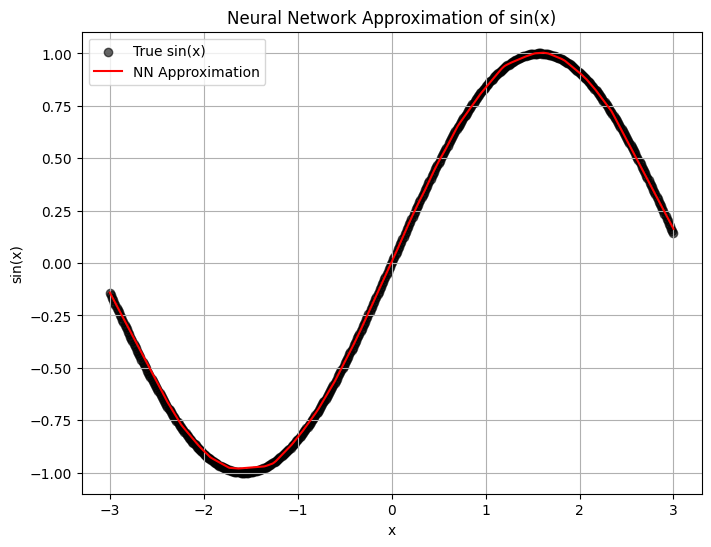

In [29]:
# Test the model
model.eval()  # Set to evaluation mode
with torch.no_grad():
    y_pred = model(x_tensor)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="True sin(x)", alpha=0.6, color='black')
plt.plot(x, y_pred.numpy(), label="NN Approximation", color='red', ls='-', alpha=1.0)
plt.legend()
plt.title("Neural Network Approximation of sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid()
plt.show()

How to access (and change) model parameters

In [18]:
for param in model.parameters():
    print(param.data)


tensor([[-0.2544],
        [-0.3628],
        [-0.0246],
        [ 0.4554],
        [ 0.2823],
        [-0.5326],
        [ 0.8012],
        [ 0.8757],
        [-0.4854],
        [-0.1948],
        [-0.9810],
        [ 0.5940],
        [-0.5849],
        [ 0.5473],
        [-0.0138],
        [-0.7737],
        [ 0.1089],
        [-0.2297],
        [ 0.7614],
        [ 0.5348],
        [-0.0996],
        [-0.4366],
        [ 0.1347],
        [ 0.8836],
        [-0.9521],
        [-0.1397],
        [ 0.3325],
        [-0.2754],
        [-0.0216],
        [ 0.6282],
        [ 0.9340],
        [ 0.5102],
        [ 0.5997],
        [ 0.1376],
        [ 0.5908],
        [ 0.4111],
        [ 0.8885],
        [-0.2412],
        [ 0.7121],
        [-0.1009],
        [ 0.3331],
        [-0.8166],
        [ 0.3168],
        [-0.1158],
        [ 0.2179],
        [ 0.2580],
        [ 0.9046],
        [-0.1282],
        [-0.0715],
        [-0.6122],
        [ 0.1408],
        [-0.5826],
        [ 0.

In [19]:
target_model = SinApproximator()

In [20]:
for param in target_model.parameters():
    print(param.data)

tensor([[ 0.1823],
        [ 0.5530],
        [-0.9573],
        [ 0.0752],
        [ 0.9379],
        [ 0.0200],
        [ 0.4075],
        [ 0.8896],
        [-0.1212],
        [ 0.2635],
        [-0.4608],
        [ 0.3348],
        [ 0.0594],
        [-0.5421],
        [-0.7200],
        [ 0.9207],
        [-0.8704],
        [ 0.7549],
        [ 0.6023],
        [-0.1122],
        [ 0.0339],
        [-0.6312],
        [ 0.2702],
        [ 0.3148],
        [ 0.6279],
        [ 0.7531],
        [-0.6865],
        [ 0.3141],
        [-0.7737],
        [ 0.8520],
        [-0.1495],
        [-0.4825],
        [ 0.4888],
        [-0.9729],
        [-0.0842],
        [ 0.9364],
        [-0.5184],
        [ 0.3936],
        [ 0.4519],
        [-0.8772],
        [ 0.7856],
        [-0.5979],
        [-0.5247],
        [-0.3940],
        [ 0.4817],
        [ 0.9524],
        [-0.2553],
        [-0.2417],
        [-0.4834],
        [ 0.4472],
        [-0.0087],
        [ 0.9017],
        [-0.